In [1]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [ ]:
ticker = 'AMZN'  #amazon  start=   end = current date

In [ ]:
ticker = 'TSLA'  #Tesla start=   end = current date

In [ ]:
ticker = 'UBER'  #Uber start=   end = current date

In [ ]:
ticker = 'TSLA'  #Tesla start=   end = current date

In [ ]:
ticker

In [2]:
import datetime as dt
from datetime import date
import yfinance as yf
import numpy as np
import tensorflow as tf

In [3]:
START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [4]:
df = load_data("AAPL")

[*********************100%%**********************]  1 of 1 completed


In [5]:
df.shape

(2338, 7)

In [6]:
data=df.filter(['Open'])
#Convert to np array
dataset=data.values
#Get the number of rows to train the model on
#math.ceil to round up 
training_data_len = math.ceil(len(dataset)*.7)
#print(dataset)
training_data_len

1637

In [7]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [8]:
#Create training dataset
#Create scaled training dataset
train_data = scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train data set
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.03046661, 0.02605116, 0.02355857, 0.02449863, 0.02739005,
       0.03228976, 0.03219006, 0.03052359, 0.02711942, 0.02848678,
       0.02425649, 0.0254102 , 0.02699122, 0.02885711, 0.03176277,
       0.03381381, 0.03193368, 0.03935448, 0.0374886 , 0.04045123,
       0.03995272, 0.04059366, 0.04059366, 0.04275865, 0.04275865,
       0.04066488, 0.04297231, 0.04667559, 0.05136166, 0.05309936,
       0.05339847, 0.05359788, 0.05480856, 0.05500797, 0.05700206,
       0.06116112, 0.05919553, 0.0552501 , 0.05697356, 0.05590531,
       0.05549226, 0.05569167, 0.054951  , 0.05469461, 0.05406791,
       0.05186019, 0.04949578, 0.04602039, 0.04899727, 0.0482566 ,
       0.05113377, 0.05270055, 0.05519314, 0.05448097, 0.05287147,
       0.05302815, 0.05204535, 0.04666135, 0.0492394 , 0.04849875])]
[0.05140439189180379]



In [9]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
#Reshape the data into 3 dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1577, 60, 1)

In [11]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.python.keras.backend import get_session

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


G:\Anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1577/1577 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - loss: 0.0021


In [12]:
#Create the test data set
#Create a new array containing scaled values
test_data=scaled_data[training_data_len-60: , : ]
#Create the data sets x_test and y_test

x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [13]:
#Convert the data to a numpy array
x_test=np.array(x_test)

In [14]:
print(x_test)

[[0.61132635 0.62682316 0.62636736 ... 0.64761848 0.65006839 0.65747488]
 [0.62682316 0.62636736 0.64061075 ... 0.65006839 0.65747488 0.66983822]
 [0.62636736 0.64061075 0.63422974 ... 0.65747488 0.66983822 0.68960797]
 ...
 [0.93203049 0.95048996 0.96741112 ... 0.83352324 0.83090242 0.86463076]
 [0.95048996 0.96741112 0.98290793 ... 0.83090242 0.86463076 0.87089789]
 [0.96741112 0.98290793 0.98518684 ... 0.86463076 0.87089789 0.85033043]]


In [15]:
#Reshape the data to 3d
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [16]:
#Get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [17]:
#Get root mean squared error(RMSE)
rmse =np.sqrt(np.mean(predictions-y_test)**2)
rmse

3.772776920683204

In [18]:
#choose plotting style

#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
#plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
#plt.style.use('bmh')
#plt.style.use('seaborn')

C:\Users\mural\AppData\Local\Temp\ipykernel_10996\4052146878.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


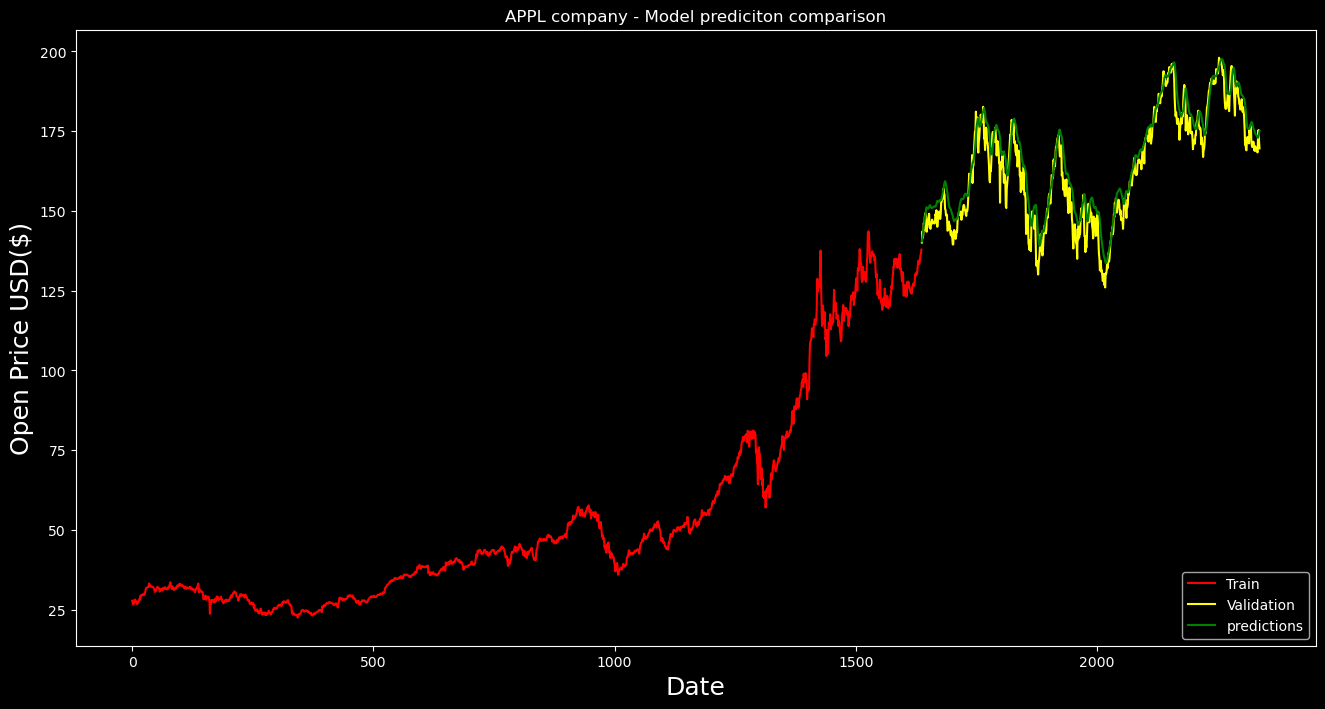

In [22]:
#plot the data

train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('APPL company - Model prediciton comparison')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD($)', fontsize=18)
plt.plot(train['Open'] , color='red')
plt.plot(valid['Open'] , color='yellow')
plt.plot(valid[ 'predictions'] , color='green')
plt.legend(['Train','Validation', 'predictions'], loc='lower right')
#plt.savefig('/content/prediction.png')
plt.show()

In [20]:
#Show the valid and predicted prices
valid.tail(15)

,Open,predictions
2323,170.410004,176.652740
2324,171.750000,175.977814
2325,171.190002,175.572372
2326,169.080002,175.274765
2327,168.789993,174.810013
2328,170.289993,174.304077
2329,169.589996,174.035202
2330,169.029999,173.818451
2331,168.699997,173.591782
2332,168.800003,173.351593


In [24]:
#Get the quote
START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")
ticker ="AAPL"

stock_quote = load_data(ticker)

new_df=stock_quote.filter(['Open'])
#Get last 60 days values and convert into array
last_60_days=new_df[-60:].values

#Scale the data to be values between 0
last_60_days_scaled=scaler.transform(last_60_days)

#Create an empty list
X_test=[]
#Appemd the past 60days
X_test.append(last_60_days_scaled)

#Conver the X_test data into numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(f'Opening Price of {ticker} tomorrow:{pred_price}')

[*********************100%%**********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Opening Price of AAPL tomorrow:[[175.1011]]


In [25]:
#Get the quote
#Get the quote
START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")
ticker ="AAPL"

stock_quote = load_data(ticker)

new_df=stock_quote.filter(['Open'])
#Get last 60 days values and convert into array
last_60_days=new_df[-60:].values

#Scale the data to be values between 0
last_60_days_scaled=scaler.transform(last_60_days)

#Create an empty list
X_test=[]
#Appemd the past 60days
X_test.append(last_60_days_scaled)

#Conver the X_test data into numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(f'Opening Price of {ticker} tomorrow:{pred_price}')

[*********************100%%**********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Opening Price of AAPL tomorrow:[[175.1011]]


In [26]:
df=web.DataReader(ticker, data_source='yahoo', start='2015-01-01', end='2020-05-24')    #YYYY-MM-DD
df

AttributeError: 'NoneType' object has no attribute 'group'